In [17]:
import numpy as np 
import pandas as pd 

import bnlearn as bn

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [18]:
# numpy check version
print(np.__version__)

1.25.2


In [19]:
train = pd.read_csv('dataset.csv')

train['Passenger ID'] = train.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
train['Passenger ID'] = range(1, len(train) + 1)

cols = list(train.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
train = train[cols]

train.set_index('Passenger ID', inplace=True)

# Tampilkan trainFrame
train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Aktivitas Wisata,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,Tunjungan Plaza,1,1,1,1,1,1,1,1,1,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,1,0,0,1
2,Tunjungan Plaza,1,1,1,1,1,1,1,0,0,...,"Makan Bersama, Mengambil Foto, Beribadah, Berb...",1,0,0,0,1,1,0,0,1
3,Tunjungan Plaza,1,0,1,1,1,1,1,0,0,...,"Makan Bersama, Belajar, Mengambil Foto, Berbel...",1,0,1,0,1,0,0,0,1
4,Tunjungan Plaza,1,1,1,1,0,0,1,1,1,...,"Makan Bersama, Mengambil Foto, Berbelanja",1,0,0,0,1,0,0,0,1
5,Tunjungan Plaza,1,1,1,1,0,1,1,0,0,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Balai Pemuda Alun - Alun Surabaya,1,0,1,1,0,1,1,1,0,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1347,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1348,Balai Pemuda Alun - Alun Surabaya,1,1,1,0,1,1,1,1,1,...,"Makan, Berolahraga, Belajar, Mengambil Foto, M...",1,1,1,0,1,0,0,1,1


In [20]:
train.describe()

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,...,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,0.893333,0.836296,0.754815,0.860000,0.408148,0.866667,0.585185,0.768889,0.562222,0.585926,...,0.520000,0.497037,0.257037,0.417037,0.059259,0.684444,0.178519,0.027407,0.318519,0.378519
std,0.308803,0.370144,0.430356,0.347116,0.491673,0.340061,0.492873,0.421700,0.496297,0.492744,...,0.499785,0.500177,0.437162,0.493252,0.236197,0.464909,0.383091,0.163328,0.466074,0.485198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
drop_list = ['Aktivitas Wisata']

train = train.drop(columns=drop_list)




In [22]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 1 to 1350
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Nama Wisata                  1350 non-null   object
 1   Escape                       1350 non-null   int64 
 2   Relaxation                   1350 non-null   int64 
 3   Play                         1350 non-null   int64 
 4   Strenghthening family bonds  1350 non-null   int64 
 5   Prestige                     1350 non-null   int64 
 6   Social Interaction           1350 non-null   int64 
 7   Romance                      1350 non-null   int64 
 8   Educational Opportunity      1350 non-null   int64 
 9   Self-fulfilment              1350 non-null   int64 
 10  Wish-fulfiment               1350 non-null   int64 
 11  Lingkungan                   1350 non-null   int64 
 12  Infrastruktur                1350 non-null   int64 
 13  Fasilitas                    1350

In [23]:
# Data preparing
dfhot_train, dfnum_train = bn.df2onehot(train)



[df2onehot] >Auto detecting dtypes.


100%|██████████| 24/24 [00:00<00:00, 100.15it/s]


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 24/24 [00:00<00:00, 186.73it/s]

[df2onehot] >Total onehot features: 73


In [24]:
dfnum_train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
0,27,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,0,0,1
1,27,1,1,1,1,1,1,1,0,0,...,1,1,0,0,0,1,1,0,0,1
2,27,1,0,1,1,1,1,1,0,0,...,1,1,0,1,0,1,0,0,0,1
3,27,1,1,1,1,0,0,1,1,1,...,1,1,0,0,0,1,0,0,0,1
4,27,1,1,1,1,0,1,1,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1,1,0,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,0,0,0
1346,1,1,1,1,1,0,1,1,1,1,...,0,0,1,1,0,1,0,0,0,0
1347,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,0,1,0,0,1,1
1348,1,1,1,1,1,0,1,1,1,1,...,0,1,1,0,0,1,0,0,1,1


In [25]:
edges = [
    ('Escape', 'Nama Wisata'),
    ('Relaxation', 'Nama Wisata'),
    ('Play', 'Nama Wisata'),
    ('Strenghthening family bonds', 'Nama Wisata'),
    ('Prestige', 'Nama Wisata'),
    ('Social Interaction', 'Nama Wisata'),
    ('Romance', 'Nama Wisata'),
    ('Educational Opportunity', 'Nama Wisata'),
    ('Self-fulfilment', 'Nama Wisata'),
    ('Wish-fulfiment', 'Nama Wisata'),
    ('Lingkungan', 'Nama Wisata'),
    ('Infrastruktur', 'Nama Wisata'),
    ('Fasilitas', 'Nama Wisata'),
    ('Akomodasi', 'Nama Wisata'),
    ('Nama Wisata', 'Makan Bersama'),
    ('Nama Wisata', 'Berolahraga'),
    ('Nama Wisata', 'Belajar'),
    ('Nama Wisata', 'Berinteraksi dengan satwa'),
    ('Nama Wisata', 'Mengambil Foto'),
    ('Nama Wisata', 'Beribadah'),
    ('Nama Wisata', 'Berkemah'),
    ('Nama Wisata', 'Melihat Pemandangan'),
    ('Nama Wisata', 'Berbelanja')
]

In [26]:
params_static = {
    'figsize': (15, 10),
    'width': 20,  # Menyesuaikan lebar panah
    'edge_alpha': 0.5,  # Menyesuaikan kejelasan panah
    'arrowstyle': '-|>',  # Gaya panah (ubah sesuai kebutuhan)
    'arrowsize': 20,  # Ukuran panah
    'minscale': 5,
    'maxscale': 15,
    'layout': 'spring_layout',
    'font_size': 14,
    'font_family': 'sans-serif',
    'alpha': 0.8,
    'node_shape': 'o',
    'font_color': '#000000',
    'facecolor': 'white',
    'visible': True
}

[bnlearn] >No CPDs to print. Hint: Add CPDs as following: <bn.make_DAG(DAG, CPD=[cpd_A, cpd_B, etc])> and use bnlearn.plot(DAG) to make a plot.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


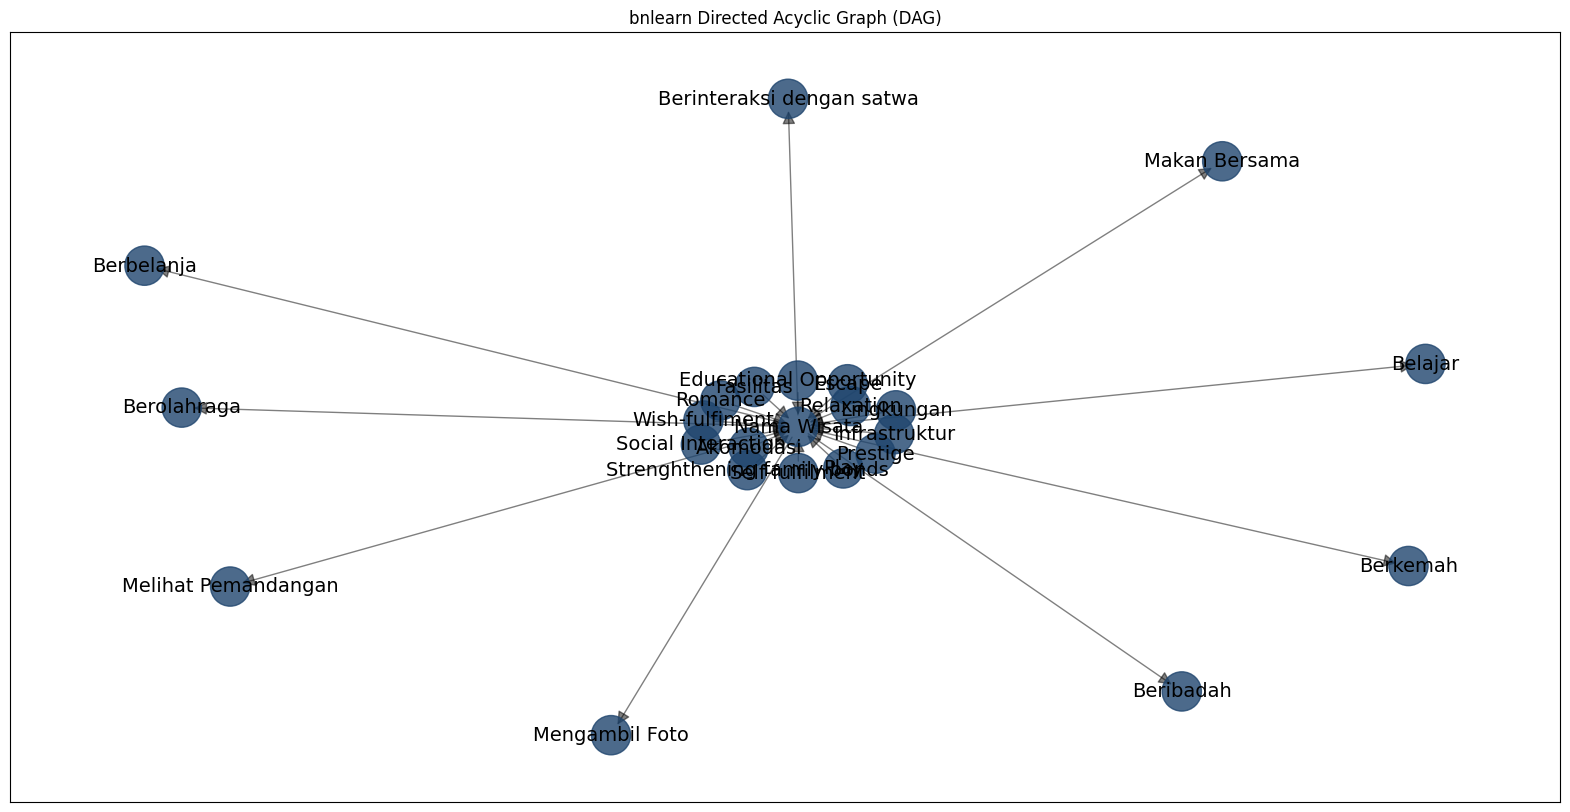

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of Escape:
+-----------+----------+
| Escape(0) | 0.274043 |
+-----------+----------+
| Escape(1) | 0.725957 |
+-----------+----------+
[bnlearn] >CPD of Nama Wisata:
+-----------------------------+-----+--------------------------------+
| Akomodasi                   | ... | Akomodasi(1)                   |
+-----------------------------+-----+--------------------------------+
| Educational Opportunity     | ... | Educational Opportunity(1)     |
+-----------------------------+-----+--------------------------------+
| Escape                      | ... | Escape(1)                      |
+-----------------------------+-----+--------------------------------+
| Fasilitas                   | ... | Fasilitas(1)                   |
+-----------------------------+-----+--------------------------------+
| Infrastruktur               | ... | Infrastruktur(1)               |
+-----------------------------+-----+-----

In [27]:
# model 1

# Structure learning yang mana seperti berikuut semua variabel / dfnum_train mengarah ke dfnum_target
DAG = bn.make_DAG(edges, verbose=0)


bn.print_CPD(DAG)


# Plot
G = bn.plot(DAG, interactive=False, params_static=params_static)


# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum_train, verbose=3);




In [28]:
# Print model
# bn.print_CPD(model)

In [1]:
# buat evidence seperti ini 
# Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,Lingkungan,Infrastruktur,Fasilitas,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
# 1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,0,1

evidence = {
    'Escape': 1,
    'Relaxation': 1,
    'Play': 1,
    'Strenghthening family bonds': 1,
    'Prestige': 0,
    'Social Interaction': 1,
    'Romance': 0,
    'Educational Opportunity': 0,
    'Self-fulfilment': 1,
    'Wish-fulfiment': 0,
    'Lingkungan': 1,
    'Infrastruktur': 0,
    'Fasilitas': 1,
    'Akomodasi': 1,
    'Makan Bersama': 1,
    'Berolahraga': 0,
    'Belajar': 0,
    'Berinteraksi dengan satwa': 0,
    'Mengambil Foto': 1,
    'Beribadah': 0,
    'Berkemah': 0,
    'Melihat Pemandangan': 0,
    'Berbelanja': 1
}


In [2]:
evidence

{'Escape': 1,
 'Relaxation': 1,
 'Play': 1,
 'Strenghthening family bonds': 1,
 'Prestige': 0,
 'Social Interaction': 1,
 'Romance': 0,
 'Educational Opportunity': 0,
 'Self-fulfilment': 1,
 'Wish-fulfiment': 0,
 'Lingkungan': 1,
 'Infrastruktur': 0,
 'Fasilitas': 1,
 'Akomodasi': 1,
 'Makan Bersama': 1,
 'Berolahraga': 0,
 'Belajar': 0,
 'Berinteraksi dengan satwa': 0,
 'Mengambil Foto': 1,
 'Beribadah': 0,
 'Berkemah': 0,
 'Melihat Pemandangan': 0,
 'Berbelanja': 1}

In [30]:
query = bn.inference.fit(model, variables=['Nama Wisata'], evidence=evidence, verbose=3)
query.df



[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------------+-------------+
|    |   Nama Wisata |           p |
+====+===============+=============+
|  0 |             1 | 0.00156317  |
+----+---------------+-------------+
|  1 |             2 | 0.00230421  |
+----+---------------+-------------+
|  2 |             3 | 0.00035706  |
+----+---------------+-------------+
|  3 |             4 | 0.0013558   |
+----+---------------+-------------+
|  4 |             5 | 0.00120174  |
+----+---------------+-------------+
|  5 |             6 | 0.0005205   |
+----+---------------+-------------+
|  6 |             7 | 0.000452077 |
+----+---------------+-------------+
|  7 |             8 | 0.000340252 |
+----+---------------+-------------+
|  8 |             9 | 0.000378519 |
+----+---------------+-------------+
|  9 |            10 | 0.00151782  |
+----+---------------+-------------+
| 10 |       

,Nama Wisata,p
0,1,0.001563
1,2,0.002304
2,3,0.000357
3,4,0.001356
4,5,0.001202
5,6,0.000521
6,7,0.000452
7,8,0.000340
8,9,0.000379
9,10,0.001518


In [31]:
# change Nama Wisata dari angka ke nama

query.df['Nama Wisata'] = {
    0: "Balai Pemuda Alun - Alun Surabaya",
    1: "Galaxy Mall Surabaya",
    2: "House of Sampoerna",
    3: "Jalan Tunjungan",
    4: "Jatim International Expo (JIE) Convention Exhibiton",
    5: "Kampung Lawas Maspati",
    6: "Kampung Pecinaan Kapasan Dalam",
    7: "Kebun Binatang Surabaya",
    8: "Kebun Raya Mangrove Gunung Anyar",
    9: "Kodam Street Food Surabaya",
    10: "Kuliner Pecinan Kembang Jepun",
    11: "Makam Sunan Ampel",
    12: "Masjid Cheng Ho",
    13: "Masjid Nasional Al Akbar",
    14: "Mirota Batik & Handicraft",
    15: "Monumen Tugu Pahlawan",
    16: "Monumen Kapal Selam",
    17: "Museum Pendidikan Surabaya",
    18: "Museum Surabaya Gedung Siola",
    19: "Pasar Genteng",
    20: "Pasar Pabean",
    21: "Pusat Olahraga KONI",
    22: "Stadion Gelora Bung Tomo",
    23: "Surabaya Convention Center",
    24: "Taman Bungkul",
    25: "Taman Suroboyo",
    26: "Tunjungan Plaza"
}

query.df = query.df.sort_values(by='p', ascending=False)
query.df

,Nama Wisata,p
20,Pasar Pabean,0.975803
1,Galaxy Mall Surabaya,0.002304
10,Kuliner Pecinan Kembang Jepun,0.002001
26,Tunjungan Plaza,0.001922
0,Balai Pemuda Alun - Alun Surabaya,0.001563
9,Kodam Street Food Surabaya,0.001518
3,Jalan Tunjungan,0.001356
19,Pasar Genteng,0.001295
16,Monumen Kapal Selam,0.001232
4,Jatim International Expo (JIE) Convention Exhi...,0.001202
